In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
df= pd.read_csv('data/Train_pjb2QcD.csv', header=0)

In [3]:
X = df.drop(['ID','Applicant_BirthDate', 'Business_Sourced', 'Applicant_City_PIN', 'Manager_DoB'], axis=1)
y = df['Business_Sourced']

In [4]:
X

,Office_PIN,Application_Receipt_Date,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,842001,4/16/2007,M,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0
1,842001,4/16/2007,M,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0
2,800001,4/16/2007,M,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,357184.0,24.0,357184.0,24.0
3,814112,4/16/2007,M,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,0.0,0.0,318356.0,22.0,318356.0,22.0
4,814112,4/16/2007,M,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,2.0,1.0,230402.0,17.0,230402.0,17.0
5,814112,4/16/2007,M,S,Others,Class XII,1/17/2006,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,247118.0,24.0,247118.0,24.0
6,842001,4/16/2007,M,M,Business,Class XII,9/1/2003,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,315119.0,27.0,315119.0,27.0
7,800001,4/16/2007,M,M,Salaried,Class XII,12/16/2006,Level 1,Level 1,2.0,Confirmation,M,5.0,4.0,117358.0,9.0,117358.0,9.0
8,209625,4/16/2007,M,M,Business,Graduate,11/18/2004,Level 1,Level 2,3.0,Confirmation,M,0.0,0.0,244028.0,17.0,244028.0,17.0
9,211001,4/16/2007,M,M,Others,Class XII,8/15/2002,Level 1,Level 3,4.0,Confirmation,M,0.0,0.0,851557.0,39.0,851557.0,39.0


In [5]:
X['Applicant_Gender'] = X['Applicant_Gender'].fillna( X.Applicant_Gender.dropna().mode().values[0])
X['Applicant_Gender'] = X['Applicant_Gender'].map({'F':0, 'M':1}).astype(np.int)

X['Applicant_Marital_Status'] = X['Applicant_Marital_Status'].fillna( X.Applicant_Marital_Status.dropna().mode().values[0])
X['Applicant_Marital_Status'] = X['Applicant_Marital_Status'].map({'S':0, 'M':1})

X['Manager_Gender'] = X['Manager_Gender'].fillna( X.Manager_Gender.dropna().mode().values[0])
X['Manager_Gender'] = X['Manager_Gender'].map({'F':0, 'M':1})

X['Manager_Status'] = X['Manager_Status'].fillna( X.Manager_Status.dropna().mode().values[0])
X['Manager_Status'] = X['Manager_Status'].map({'Probation':0, 'Confirmation':1}).astype(np.int)

X['Applicant_Occupation'] = X['Applicant_Occupation'].fillna( X.Applicant_Occupation.dropna().mode().values[0])
X['Applicant_Occupation'] = X['Applicant_Occupation'].map({'Others':0, 'Business':1, 'Salaried':2,
                                                           'Self Employed':3,'Student':4}).astype(np.int)

X['Applicant_Qualification'] = X['Applicant_Qualification'].fillna( X.Applicant_Qualification.dropna().mode().values[0])
X['Applicant_Qualification'] = X['Applicant_Qualification'].map({'Graduate':0,
                                                                 'Class XII':1,
                                                                 'Class X':2, 
                                                                 'Masters of Business Administration':3,
                                                                 'Associate/Fellow of Institute of Company Secretories of India':4,
                                                                 'Associate / Fellow of Institute of Chartered Accountans of India':5,
                                                                 'Others':6,
                                                                 'Associate/Fellow of Insurance Institute of India':7,
                                                                 'Associate/Fellow of Acturial Society of India':8,
                                                                 'Certified Associateship of Indian Institute of Bankers':9,
                                                                 'Professional Qualification in Marketing':10}).astype(np.int)


X['Manager_Joining_Designation'] = X['Manager_Joining_Designation'].fillna( X.Manager_Joining_Designation.dropna().mode().values[0])
X['Manager_Joining_Designation'] = X['Manager_Joining_Designation'].map({'Other':0, 'Level 1':1, 'Level 2':2,
                                                                         'Level 3':3, 'Level 4':4, 'Level 5':5,
                                                                         'Level 6':6, 'Level 7':7}).astype(np.int)

X['Manager_Current_Designation'] = X['Manager_Current_Designation'].fillna( X.Manager_Current_Designation.dropna().mode().values[0])
X['Manager_Current_Designation'] = X['Manager_Current_Designation'].map({'Level 1':1, 'Level 2':2, 'Level 3':3,
                                                                         'Level 4':4, 'Level 5':5}).astype(np.int)

In [6]:
X['Manager_Num_Application'] = X['Manager_Num_Application'].fillna( X.Manager_Num_Application.dropna().mode().values[0]).astype(np.int)
X['Manager_Num_Coded'] = X['Manager_Num_Coded'].fillna( X.Manager_Num_Coded.dropna().mode().values[0]).astype(np.int)
X['Manager_Num_Products'] = X['Manager_Num_Products'].fillna( X.Manager_Num_Products.dropna().mode().values[0]).astype(np.int)
X['Manager_Num_Products2'] = X['Manager_Num_Products2'].fillna( X.Manager_Num_Products2.dropna().mode().values[0]).astype(np.int)
X['Manager_Business'] = X['Manager_Business'].fillna( X.Manager_Business.dropna().mean()).astype(np.int)
X['Manager_Business2'] = X['Manager_Business2'].fillna( X.Manager_Business2.dropna().mean()).astype(np.int)

X['Manager_Grade'] = X['Manager_Grade'].fillna( X.Manager_Grade.dropna().mode().values[0]).astype(np.int)
X['Applicant_Receipt_Month'] = [t.month for t in pd.DatetimeIndex(X.Application_Receipt_Date)]
X['Manager_Join_Year'] = [t.year for t in pd.DatetimeIndex(X.Manager_DOJ)]
X['Manager_Join_Month'] = [t.month for t in pd.DatetimeIndex(X.Manager_DOJ)]
X= X.drop(['Application_Receipt_Date', 'Manager_DOJ'], axis=1)
X['Manager_Join_Year'] = X['Manager_Join_Year'].fillna( X.Manager_Join_Year.dropna().mean()).astype(np.int)
X['Manager_Join_Month'] = X['Manager_Join_Month'].fillna( X.Manager_Join_Month.dropna().mean()).astype(np.int)

X['Applicant_Marital_Status'] = X['Applicant_Marital_Status'].fillna( X.Applicant_Marital_Status.dropna().mode().values[0])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Office_PIN'] = le.fit_transform(X['Office_PIN'])

In [7]:
X

,Office_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Applicant_Receipt_Month,Manager_Join_Year,Manager_Join_Month
0,94,1,1.0,0,0,1,2,3,1,1,2,1,335249,28,335249,28,4,2005,11
1,94,1,0.0,0,1,1,2,3,1,1,2,1,335249,28,335249,28,4,2005,11
2,83,1,1.0,1,1,1,1,2,1,1,0,0,357184,24,357184,24,4,2006,5
3,88,1,0.0,2,1,1,3,4,1,0,0,0,318356,22,318356,22,4,2003,8
4,88,1,1.0,0,1,1,1,2,1,1,2,1,230402,17,230402,17,4,2006,5
5,88,1,0.0,0,1,1,1,2,1,1,0,0,247118,24,247118,24,4,2006,1
6,94,1,1.0,1,1,1,1,2,1,1,0,0,315119,27,315119,27,4,2003,9
7,83,1,1.0,2,1,1,1,2,1,1,5,4,117358,9,117358,9,4,2006,12
8,17,1,1.0,1,0,1,2,3,1,1,0,0,244028,17,244028,17,4,2004,11
9,18,1,1.0,0,1,1,3,4,1,1,0,0,851557,39,851557,39,4,2002,8


In [8]:
X.isnull().sum()

Office_PIN                     0
Applicant_Gender               0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Applicant_Receipt_Month        0
Manager_Join_Year              0
Manager_Join_Month             0
dtype: int64

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
from sklearn.preprocessing import StandardScaler
sle = StandardScaler()
X_train_std = sle.fit_transform(X_train)
X_test_std = sle.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy', n_estimators=500, oob_score=True, random_state=1, n_jobs=-1)
forest.fit(X_train_std, y_train)
y_train_pred = forest.predict(X_train_std)
y_test_pred = forest.predict(X_test_std)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

print(' Accuracy test score = %.3f' % accuracy_score(y_test_pred, y_test))
print(' OOB score = %.3f' %forest.oob_score_)
con = confusion_matrix(y_test, y_test_pred)
print('AUC test score = %.3f' % roc_auc_score(y_score=y_test_pred, y_true=y_test))
print(con)

 Accuracy test score = 0.646
 OOB score = 0.641
AUC test score = 0.558
[[1311  256]
 [ 587  228]]


In [13]:
from sklearn.metrics import roc_curve, auc

def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in range(0, fpr.shape[0],labe):
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

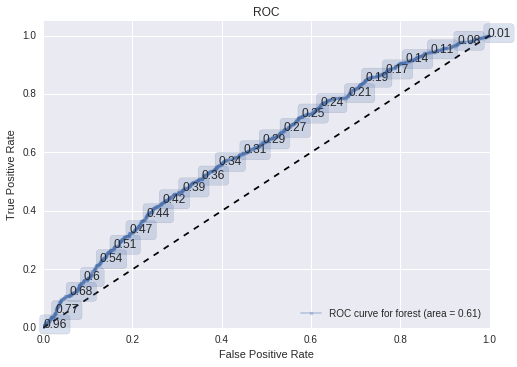

In [14]:
make_roc("forest",forest, y_test, X_test_std, None, labe=50)

In [15]:
def repredict(est,t, xtest):
    probs=est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 >= t)*1
    return ypred

In [16]:
y_test_pred= repredict(forest, .42, X_test_std)
con = confusion_matrix(y_test, y_test_pred)
print(con)
print('AUC test score = %.3f' % roc_auc_score(y_score=y_test_pred, y_true=y_test))

[[1154  413]
 [ 471  344]]
AUC test score = 0.579
